# **Content Based Recommendation System Notebook**
**This notebook is trial version of making content based recommendation system model. This version still need to be upgraded for more complex recommendation algorithm.**

In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

# **Upload Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tourism_with_id.csv to tourism_with_id.csv


# **Load Dataset**

In [3]:
#Reading the file
df = pd.read_csv("tourism_with_id.csv")
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,2500,4.6,90,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,240,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


In [4]:
#Checking the shape of the file
df.shape

(515, 11)

# **Exploratory Data Analysis**

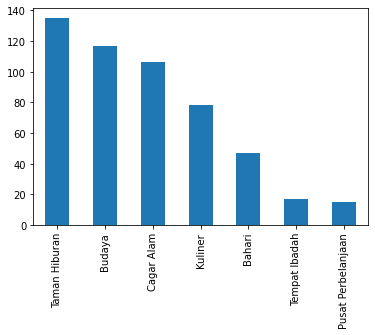

In [5]:
#Genre Distribution
df['Category'].value_counts().plot(x='Category', y='count', kind='bar')

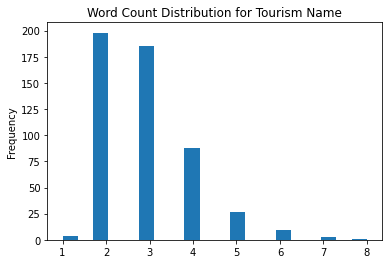

In [6]:
#Plotting the word count
df['word_count'] = df['Place_Name'].apply(lambda x: len(str(x).split()))
df['word_count'].plot(
    kind='hist',
    bins= 20,
    title='Word Count Distribution for Tourism Name')

# **Making Tags based on Place Name, Description, Category, City**

In [7]:
df['tags'] = df['Description'] + df['Place_Name'] + df['Category'] + df['City']

In [8]:
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,word_count,tags
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,2,Monumen Nasional atau yang populer disingkat d...
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,2500,4.6,90,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,2,"Kota tua di Jakarta, yang juga bernama Kota Tu..."
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,2,Dunia Fantasi atau disebut juga Dufan adalah t...
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,240,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,5,Taman Mini Indonesia Indah merupakan suatu kaw...
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,3,Atlantis Water Adventure atau dikenal dengan A...


In [9]:
new_df = df[['Place_Id', 'Place_Name', 'tags']]

In [10]:
new_df

,Place_Id,Place_Name,tags
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu..."
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...
...,...,...,...
510,511,Kawi Lounge,"Selain menyediakan makanan yang lezat, bagi an..."
511,512,Citrus Lee,Citrus Lee memiliki banyak pilihan menu mulai ...
512,513,Citilites Skyclub and Bistro,Ikon Java Paragon Hotel and Residences yang te...
513,514,Historica,"empatnya tidak begitu luas, tetapi penataan te..."


In [11]:
new_df['tags'][0]

'Monumen Nasional atau yang populer disingkat dengan Monas atau Tugu Monas adalah monumen peringatan setinggi 132 meter (433 kaki) yang didirikan untuk mengenang perlawanan dan perjuangan rakyat Indonesia untuk merebut kemerdekaan dari pemerintahan kolonial Hindia Belanda. Pembangunan monumen ini dimulai pada tanggal 17 Agustus 1961 di bawah perintah presiden Soekarno dan dibuka untuk umum pada tanggal 12 Juli 1975. Tugu ini dimahkotai lidah api yang dilapisi lembaran emas yang melambangkan semangat perjuangan yang menyala-nyala. Monumen Nasional terletak tepat di tengah Lapangan Medan Merdeka, Jakarta Pusat.Monumen NasionalBudayaJakarta'

In [12]:
new_df['tags'].apply(lambda x:x.lower())

0      monumen nasional atau yang populer disingkat d...
1      kota tua di jakarta, yang juga bernama kota tu...
2      dunia fantasi atau disebut juga dufan adalah t...
3      taman mini indonesia indah merupakan suatu kaw...
4      atlantis water adventure atau dikenal dengan a...
                             ...                        
510    selain menyediakan makanan yang lezat, bagi an...
511    citrus lee memiliki banyak pilihan menu mulai ...
512    ikon java paragon hotel and residences yang te...
513    empatnya tidak begitu luas, tetapi penataan te...
514    empatnya tidak begitu luas, tetapi penataan te...
Name: tags, Length: 515, dtype: object

# **Vectorization**

In [13]:
stopwords= ["atau", "adalah", "yang", "untuk", "dan", "dari", "ke", "ini", "itu", "pada"
            ,"di", "tepat", "sedangkan", "dengan", "seperti", "terdapat", "merupakan"
            ,"suatu", "kurang", "lebih", "bisa", "menjadi", "sebuah", "tahun", "dalamnya"
            ,"dalam", "luar", "keluar", "sejak", "ada", "memiliki", "banyak", "antara"
            ,"lain", "salah", "menawarkan", "tidak", "ya", "para", "pengunjung", "bisa"
            ,"bisa", "perlu", "khawatir", "masih"]

In [14]:
cv = CountVectorizer(max_features=5000, stop_words=stopwords)

In [15]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [16]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '01',
 '016',
 '02',
 '02223',
 '023',
 '039',
 '04',
 '05',
 '050',
 '06',
 '062',
 '07',
 '077',
 '08',
 '084',
 '09',
 '097',
 '10',
 '100',
 '1000',
 '102',
 '106',
 '1063',
 '107',
 '1070',
 '11',
 '1150',
 '118',
 '12',
 '120',
 '1200',
 '121',
 '1225',
 '123',
 '13',
 '1300',
 '131',
 '1310',
 '132',
 '135',
 '136',
 '137',
 '1384',
 '139',
 '14',
 '140',
 '143',
 '15',
 '150',
 '1500',
 '15111',
 '1556',
 '157',
 '16',
 '160',
 '1600',
 '160m',
 '1625',
 '1628',
 '165',
 '1650',
 '169',
 '17',
 '1700',
 '1707',
 '1710',
 '1731',
 '1735',
 '1740',
 '1743',
 '1753',
 '1755',
 '1758',
 '1765',
 '18',
 '180',
 '1804',
 '1810',
 '1812',
 '1814',
 '1815',
 '1818',
 '1820',
 '1828',
 '184',
 '1850',
 '1861',
 '1862',
 '1864',
 '1877',
 '1879',
 '1881',
 '1885',
 '1890',
 '1894',
 '1895',
 '1896',
 '19',
 '1901',
 '1906',
 '1913',
 '1916',
 '1918',
 '1920',
 '1921',
 '1922',
 '1923',
 '1924',
 '1926',
 '1927',
 '1928',
 '1929',
 '1931',
 '1932',
 '1933',
 '1937',
 '1940

In [19]:
len(cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


5000

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
similarity = cosine_similarity(vectors)

In [22]:
similarity

array([[1.        , 0.04896287, 0.13644421, ..., 0.        , 0.        ,
        0.        ],
       [0.04896287, 1.        , 0.0672842 , ..., 0.0232747 , 0.        ,
        0.        ],
       [0.13644421, 0.0672842 , 1.        , ..., 0.        , 0.08247861,
        0.08247861],
       ...,
       [0.        , 0.0232747 , 0.        , ..., 1.        , 0.04279605,
        0.04279605],
       [0.        , 0.        , 0.08247861, ..., 0.04279605, 1.        ,
        1.        ],
       [0.        , 0.        , 0.08247861, ..., 0.04279605, 1.        ,
        1.        ]])

In [23]:
def recommend(place):
  df_index = new_df[new_df['Place_Name'] == place].index[0]
  distances = similarity[df_index]
  df_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]

  for i in df_list:
    print(new_df.iloc[i[0]].Place_Name)

In [25]:
recommend('Monumen Nasional')

Monumen Selamat Datang
Monumen Bandung Lautan Api
Monumen Perjuangan Rakyat Jawa Barat
Monumen Bambu Runcing Surabaya
Monumen Sanapati
